# 🧠 Building the Reflection Pattern from Scratch in AI Agents 

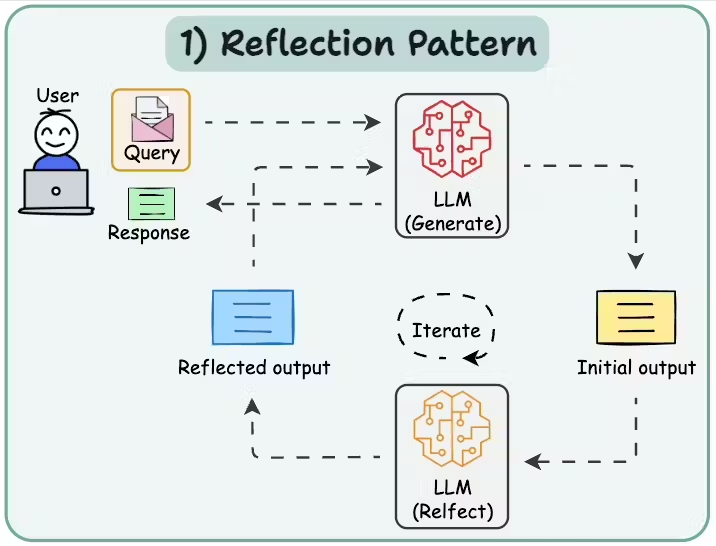<img src="images\reflection_pattern.avif"  width="600">

This notebook explores the Reflection Pattern in autonomous AI agents—a powerful design approach that enables agents to self-evaluate, reason about past actions, and adapt behavior over time. Inspired by recent research such as Reflexion and ReAct, this pattern integrates self-monitoring and iterative refinement into the agent loop, making agents more robust, sample-efficient, and capable of long-term planning.

## ✨ What You'll Learn:
   ### How to implement a self-reflective feedback loop for an agent
   ### How agents can evaluate their own thoughts and actions
   ### How reflection fits within modern frameworks like LangGraph and AutoGPT
   ### The architectural components necessary to build the pattern from scratch

In [ ]:
from Utils.utils import llm #the llm is a function that return the llm responce

## generate response

In [ ]:
#create a generation block 
generation_history = [
    {
        "role" : "user",
        "content":"what is the purpose of the reflection agent?"
    }
]


generation_response = llm(generation_history[0]['content'])

generation_history.append({
    "role" : "assistant",
    "content":generation_response
})




In [ ]:
print("Generation History:\n"+str(generation_history[-1]['content']))

Generation History:The purpose of a "reflection agent" (also sometimes called a reflective agent or introspective agent) is to **analyze its own behavior, reasoning process, and internal state in order to improve its future performance.** It's about the agent *thinking about its thinking*.

Here's a breakdown of why this is important and what it entails:

*   **Improving Performance:** The core goal is to learn from past experiences (both successes and failures) and adapt its strategies, knowledge, or goals accordingly.  This leads to better decision-making and problem-solving over time.
*   **Identifying Errors and Biases:**  A reflection agent can examine its reasoning steps to find flaws in its logic, incorrect assumptions, or biases that led to suboptimal outcomes.
*   **Knowledge Acquisition and Refinement:** By reflecting on its successes, it can identify effective strategies and patterns, consolidating them into its knowledge base.  It can also identify gaps in its knowledge and

## Reflect on the response

In [20]:
#create a reflection block
reflection_history = [
    {
        "role" : 'system',
        'content' : 'You are an prompt critique. and your task is to reflect on the generation history and provide feedback on how to improve the generation process. You should analyze the content generated by the assistant and suggest improvements to generation .generation : '
    }
]

reflection_response = llm.generate_content(contents=[reflection_history[0]['content'] +generation_history[-1]['content']],
                                           model='gemini-2.0-flash').text

reflection_history.append(
    {
        'role' : 'assitant',
        'content' : reflection_response
    }
)

In [21]:
print("Generation History:" + reflection_response)

Generation History:Okay, here's my critique of the generated text about reflection agents, along with suggestions for improvement:

**Overall Assessment:**

The text provides a solid, comprehensive explanation of reflection agents. It covers the key aspects, benefits, and how reflection works in a clear and understandable manner. The example is also helpful. However, there's room for improvement in terms of clarity, structure, and depth in certain areas.

**Strengths:**

*   **Clear Definition:** The opening paragraph clearly defines the purpose of a reflection agent.
*   **Well-Organized Structure:** The use of bullet points to highlight the reasons for reflection agents is effective.
*   **Comprehensive Coverage:** The text touches upon all the major aspects of reflection agents, including performance improvement, error detection, knowledge acquisition, adaptation, explainability, and meta-learning.
*   **Good Example:** The maze-navigating robot is a relatable and effective illustra

## Regenerate the responce

In [24]:
#regenerate the response 
regeneration_prompt = {
    'role' : 'system',
    'content' : 'Regenerate the response based on the reflection. reflection : '
}

regeneration_response = llm.generate_content(contents=[regeneration_prompt['content'] + reflection_history[-1]['content']],
                                             model='gemini-2.0-flash').text    

generation_history.append({
    "role" : "assistant",
    "content": regeneration_response
})  


In [26]:
#print the fianl responce
print(regeneration_response)

Okay, here's a revised explanation of reflection agents, incorporating the feedback provided:

**Reflection Agents: Learning from Experience**

A reflection agent is an intelligent agent designed to improve its performance by analyzing its past experiences and learning from its successes and failures. Unlike standard agents that execute pre-programmed or directly learned behaviors, reflection agents actively contemplate their actions, reasoning about what went right or wrong and adjusting their strategies accordingly. This self-assessment allows them to adapt to new situations, refine their knowledge, and ultimately achieve better results.

Why are reflection agents valuable? They offer several key benefits:

*   **Performance Improvement:** By identifying and correcting errors, reflection agents can continually refine their strategies and improve their overall performance.
*   **Error Detection and Correction:** Reflection allows the agent to pinpoint the causes of mistakes, preventin